# <center>Деревья регрессии</center>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Рассмотрим сдедующую задачу регрессии:

In [2]:
X = np.linspace(-2, 2, 7)
y = X ** 3

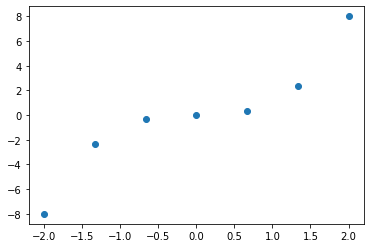

In [3]:
plt.scatter(X, y)
plt.show()

Проделаем несколько шагов в построении дерева регрессии. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. В случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

**Задание 1.** Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку. Как будут выглядеть предсказания данного дерева для $x \in [-2, 2]$? Постройте соответствующий график.

In [7]:
from statistics import mean

In [8]:
tree0 = mean(y)
tree0

-3.5685740077237176e-16

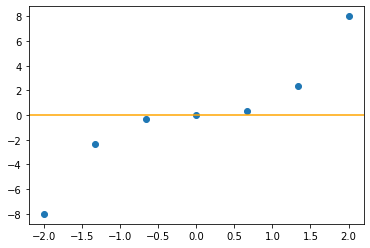

In [13]:
plt.axhline(y=tree0, xmin=-2, xmax=2, color='orange')
plt.scatter(X, y)
plt.show()

**Задание 2.** Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

In [16]:
xL = X[X < 0]
yL = y[X < 0]

xR = X[X >= 0]
yR = y[X >= 0]

In [18]:
treeLX = mean(xL)
treeRX = mean(xR)

treeLY = mean(yL)
treeRY = mean(yR)

In [31]:
coefficients = np.polyfit([treeLX, treeRX], [treeLY, treeRY], 1) 
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(-3, 3)
y_axis = polynomial(x_axis)

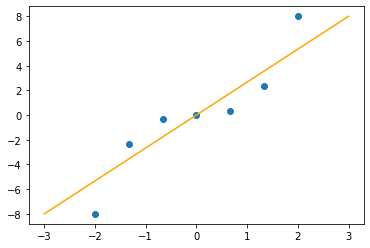

In [32]:
plt.plot(x_axis, y_axis, color='orange')

plt.scatter(X, y)
plt.show()

В алгоритме построения дерева регрессии признак и значение порога, по которым происходит разбиение выборки, выбираются по дисперсионному критерию:
$$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$
где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[x_j < t]$ (то есть по $j$-ому признаку и порогу $t$), а $D(X)$ – дисперсия ответов на выборке $X$:
$$D(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j – \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2,$$
где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, максимизирующие значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине). 

**Задание 3.** Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

In [39]:
def regression_var_criterion(X, y, t):
    xL = X[X < t]
    yL = y[X < t]
    dL = yL.std() ** 2

    xR = X[X >= t]
    yR = y[X >= t]
    dR = yR.std() ** 2
    
    d = y.std() ** 2
    
    return d - len(xL) / len(X) * dL - len(xR) / len(X) * dR 

In [40]:
t = np.linspace(-1.9, 1.9, 100)

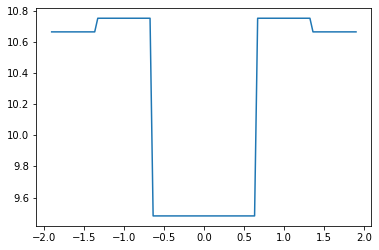

In [42]:
plt.plot(t, [regression_var_criterion(X, y, i) for i in t])
#plt.scatter(X, y)
plt.show()

Оптимально ли с точки зрения дисперсионного критерия выбранное нами значение порога $t = 0$?

**Задание 4.** Теперь произведем разбиение в каждой из листовых вершин. В левой (соответствующей ветви $x < 0$) – по предикату $[x < -1.5]$, а в правой (соответствующей ветви $x \geqslant 0$) – по предикату $[x < 1.5]$. Получится дерево глубины 2 с 7 вершинами и 4 листьями. Постройте график предсказаний этого дерева для $x \in [-2, 2]$.

In [43]:
xL = X[X < 0]
yL = y[X < 0]

xR = X[X >= 0]
yR = y[X >= 0]

In [65]:
xLL = xL[xL < -1.5]
yLL = yL[xL < -1.5]

xLR = xL[xL >= -1.5]
yLR = xL[xL >= -1.5]


xRL = xR[xR < 1.5]
yRL = yR[xR < 1.5]

xRR = xR[xR >= 1.5]
yRR = yR[xR >= 1.5]

In [66]:
part1X = mean(xLL)
part1Y = mean(yLL)

part2X = mean(xLR)
part2Y = mean(yLR)

part3X = mean(xRL)
part3Y = mean(yRL)

part4X = mean(xRR)
part4Y = mean(yRR)

In [79]:
part1Y, tree0

(-8.0, -3.5685740077237176e-16)

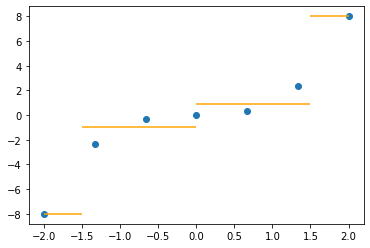

In [91]:
plt.hlines(y=-8, xmin=-2, xmax=-1.5, color='orange')
plt.hlines(y=part2Y, xmin=-1.5, xmax=0, color='orange')
plt.hlines(y=part3Y, xmin=0, xmax=1.5, color='orange')
plt.hlines(y=part4Y, xmin=1.5, xmax=2, color='orange')


plt.scatter(X, y)
plt.show()

In [67]:
coefficients1 = np.polyfit([part1X, part2X], [part1Y, part2Y], 1) 
polynomial1 = np.poly1d(coefficients1)
x_axis1 = np.linspace(part1X, part2X)
y_axis1 = polynomial1(x_axis1)

coefficients2 = np.polyfit([part2X, part3X], [part2Y, part3Y], 1) 
polynomial2 = np.poly1d(coefficients2)
x_axis2 = np.linspace(part2X, part3X)
y_axis2 = polynomial2(x_axis2)

coefficients3 = np.polyfit([part3X, part4X], [part3Y, part4Y], 1) 
polynomial3 = np.poly1d(coefficients3)
x_axis3 = np.linspace(part3X, part4X)
y_axis3 = polynomial3(x_axis3)

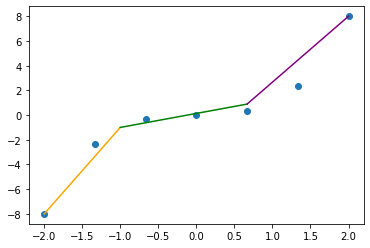

In [68]:
plt.plot(x_axis1, y_axis1, color='orange')
plt.plot(x_axis2, y_axis2, color='green')
plt.plot(x_axis3, y_axis3, color='purple')

plt.scatter(X, y)
plt.show()

Из скольки отрезков состоит график, изображающий предсказания построенного дерева на отрезке $[-2, 2]$?